In [9]:
import pandas as pd
from matplotlib import pyplot as plt
import os 

# Preparation
## Get T1 image
18 controls and 11 patients. All images are bias corrected using fsl_anat.

In [2]:
!ls *.nii.gz

c01.nii.gz  c06.nii.gz	c12.nii.gz  c18.nii.gz	p16.nii.gz  p23.nii.gz
c02.nii.gz  c07.nii.gz	c13.nii.gz  c19.nii.gz	p18.nii.gz  p24.nii.gz
c03.nii.gz  c09.nii.gz	c14.nii.gz  p13.nii.gz	p19.nii.gz  p30.nii.gz
c04.nii.gz  c10.nii.gz	c16.nii.gz  p14.nii.gz	p21.nii.gz
c05.nii.gz  c11.nii.gz	c17.nii.gz  p15.nii.gz	p22.nii.gz


In [5]:
# check images
# !slicesdir `imglob *`

## Create template list
choose 11 control's image and 11 patient's iamge

In [4]:
# check template_list
# !gedit template_list

## Create glm model

In [5]:
#!gedit ./etc/design.mat

In [6]:
#!gedit ./etc/design.con

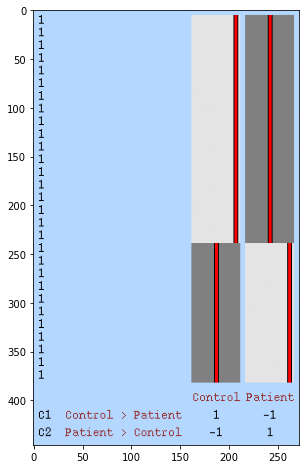

In [7]:
plt.figure(figsize=(6, 8))
im = plt.imread('./etc/design.png')
plt.imshow(im)

# Data Analysis
## Run VBM

In [6]:
%%time
!fslvbm_1_bet -N 

c01_struc
c02_struc
c03_struc
c04_struc
c05_struc
c06_struc
c07_struc
c09_struc
c10_struc
c11_struc
c12_struc
c13_struc
c14_struc
c16_struc
c17_struc
c18_struc
c19_struc
p13_struc
p14_struc
p15_struc
p16_struc
p18_struc
p19_struc
p21_struc
p22_struc
p23_struc
p24_struc
p30_struc
Done running BET, now running slicesdir:
c01_struc
c02_struc
c03_struc
c04_struc
c05_struc
c06_struc
c07_struc
c09_struc
c10_struc
c11_struc
c12_struc
c13_struc
c14_struc
c16_struc
c17_struc
c18_struc
c19_struc
p13_struc
p14_struc
p15_struc
p16_struc
p18_struc
p19_struc
p21_struc
p22_struc
p23_struc
p24_struc
p30_struc

Finished. To view, point your web browser at
file:/home/jzni/SCI_data/cleaned_data/MRI/vbm_hc_pt/struc/slicesdir/index.html
CPU times: user 21.7 s, sys: 6.63 s, total: 28.3 s
Wall time: 16min 54s


In [8]:
%%time
!fslvbm_2_template -n

c01_struc
c02_struc
c03_struc
c04_struc
c05_struc
c06_struc
c07_struc
c09_struc
c10_struc
c11_struc
c12_struc
c13_struc
c14_struc
c16_struc
c17_struc
c18_struc
c19_struc
p13_struc
p14_struc
p15_struc
p16_struc
p18_struc
p19_struc
p21_struc
p22_struc
p23_struc
p24_struc
p30_struc
Running segmentation: ID=113608
Running initial registration: ID=116597
Creating first-pass template: ID=119157
Running registration to first-pass template: ID=119697
Creating second-pass template: ID=125607
Study-specific template will be created, when complete, check results with:
fslview struc/template_4D_GM
and turn on the movie loop to check all subjects, then run:
fslview  /home/jzni/FSL/fsl/data/standard/tissuepriors/avg152T1_gray  struc/template_GM
to check general alignment of mean GM template vs. original standard space template.
CPU times: user 4min 2s, sys: 1min 13s, total: 5min 16s
Wall time: 2h 54min 10s


In [11]:
%%time
!fslvbm_3_proc

Now running the preprocessing steps and the pre-analyses
c01_struc
c02_struc
c03_struc
c04_struc
c05_struc
c06_struc
c07_struc
c09_struc
c10_struc
c11_struc
c12_struc
c13_struc
c14_struc
c16_struc
c17_struc
c18_struc
c19_struc
p13_struc
p14_struc
p15_struc
p16_struc
p18_struc
p19_struc
p21_struc
p22_struc
p23_struc
p24_struc
p30_struc
Doing registrations: ID=139682
Doing subject concatenation and initial randomise: ID=150677
Once this has finished, run randomise with 5000 permutations on the 'best' smoothed 4D GM_mod_merg. We recommend using the -T (TFCE) option. For example:
randomise -i GM_mod_merg_s3 -o GM_mod_merg_s3 -m GM_mask -d design.mat -t design.con -n 5000 -T -V
CPU times: user 3min 10s, sys: 58.1 s, total: 4min 8s
Wall time: 2h 24min 59s


## Run randomise
### Create Mask

``` shell
fslmaths GM_mod_merg -s 5 GM_mod_merg_s5
fslmaths GM_mod_merg -s 8 GM_mod_merg_s8
```


### TFCE And cluster-based thresholding

``` shell
for s in s5	s8; do
    smooth="GM_mod_merg_"${s}".nii.gz"
    
    # TFCE_based thresholding
    randomise -i ${smooth} -m GM_mask -o ${s} -d design.mat -t design.con -T -n 5000 &
    
    # cluster-based thresholding
    randomise -i ${smooth} -m GM_mask -o ${s} -d design.mat -t design.con -c 2.3 -n 5000
    for f in 1 2 ; do
        fslmaths ${s}_clustere_corrp_tstat${f} -thr 0.95 -bin mask_pcorrected
        fslmaths ${s}_tstat${f} -mas mask_pcorrected ${s}_tstat${f}_corrected
    done
done
```

change mask premotor s1

In [ ]:
%%time
!bash vbm_randomise.sh

# Result
**17 Control, 11 Patients**  
c15 has lots of head motion

In [23]:
!firefox struc/slicesdir/index.html

## TFCE

In [4]:
!fsleyes -std stats/s5/s5_tstat1_corrected -cm "red-yellow" 

## Cluster-based 

In [9]:
!fsleyes -std stats/s5/s5_clustere_corrp_tstat1 -cm "red-yellow" -dr 0.949 1

## Tstat

In [1]:
!fsleyes -std stats/s5/s5_tstat1 -cm "red-yellow" -dr 3.1 5


  return len(self._mapping)



In [2]:
!fsleyes -std stats/s5/s5_tstat2 -cm "red-yellow" -dr 3.1 5

In [7]:
# cluster -i fslvbm_tfce_corrp_tstat1 -t 0.5 --mm # 默认是图像中的坐标，加上--mm 可以显示MNI空间的坐标
# cluster -i fslvbm_tfce_corrp_tstat1 -t 0.5 -o cluster_index --osize=cluster_size >cluster_info.txt #导出结果


!name=s5 ; thershold=3.1; num=1; cluster -i stats/${name}/${name}_tstat${num} --mm --minextent=10 -t $thershold -o ${name}_stat${num}_${thershold}_cluster_size >${name}_stat${num}_${thershold}_cluster_info.txt
!name=s5 ; thershold=2.3; num=1; cluster -i stats/${name}/${name}_tstat${num} --mm --minextent=10 -t $thershold -o ${name}_stat${num}_${thershold}_cluster_size >${name}_stat${num}_${thershold}_cluster_info.txt

In [16]:
print("smooth=5mm  Control > Patient thershold t value=3.1")
pd.read_csv('s5_stat1_3.1_cluster_info.txt', sep='\t')

smooth=5mm  Control > Patient thershold t value=3.1


,Cluster Index,Voxels,MAX,MAX X (mm),MAX Y (mm),MAX Z (mm),COG X (mm),COG Y (mm),COG Z (mm)
0,5,443,4.66,-48,34,34,-42.00,31.900,35.4
1,4,224,4.17,36,-2,-38,35.90,0.599,-41.4
2,3,35,3.25,54,-50,16,55.80,-50.000,11.2
3,2,27,3.62,54,18,34,51.40,18.900,35.1
4,1,27,3.54,-4,-30,50,-4.06,-30.300,50.6


In [3]:
#atlasquery -a "MNI Structural Atlas" -c -40,-22,-26 # 查询语句
for i in range(100):
    !fsleyes
    
# cluster index 5
!atlasquery -a "MNI Structural Atlas" -c -48,34,34
!atlasquery -a "Juelich Histological Atlas" -c -48,34,34
!atlasquery -a "Talairach Daemon Labels" -c -48,34,34

<b>MNI Structural Atlas</b><br>40% Frontal Lobe
<b>Juelich Histological Atlas</b><br>6% GM Broca's area BA45 L, 1% GM Broca's area BA44 L
<b>Talairach Daemon Labels</b><br>Left Cerebrum.Frontal Lobe.Middle Frontal Gyrus.Gray Matter.Brodmann area 9


In [18]:
print("smooth=5mm  Control > Patient thershold t value=2.3")
pd.read_csv('s5_stat1_2.3_cluster_info.txt', sep='\t')

smooth=5mm  Control > Patient thershold t value=2.3


,Cluster Index,Voxels,MAX,MAX X (mm),MAX Y (mm),MAX Z (mm),COG X (mm),COG Y (mm),COG Z (mm)
0,20,1166,4.66,-48,34,34,-41.00,29.600,35.300
1,19,697,3.25,54,-50,16,57.20,-51.500,10.900
2,18,561,4.17,36,-2,-38,35.90,-0.861,-42.200
3,17,488,3.62,54,18,34,47.70,20.500,36.000
4,16,349,3.03,-44,-78,10,-40.70,-79.800,20.900
5,15,216,2.96,-58,-66,-2,-58.40,-61.300,2.200
6,14,173,3.04,-34,-96,-8,-29.30,-94.800,-8.580
7,13,161,3.54,-4,-30,50,-3.50,-30.600,50.000
8,12,138,3.03,2,24,-2,1.17,23.400,-4.110
9,11,136,2.79,6,64,4,6.24,62.700,2.870


In [19]:
print("cluster index 13")
!atlasquery -a "MNI Structural Atlas" -c 56,-50,4
!atlasquery -a "Juelich Histological Atlas" -c 56,-50,4
print("cluster index 12")
!atlasquery -a "MNI Structural Atlas" -c 54,18,34
!atlasquery -a "Juelich Histological Atlas" -c 54,18,34
print("cluster index 11")
!atlasquery -a "MNI Structural Atlas" -c 36,4,-40
!atlasquery -a "Juelich Histological Atlas" -c 36,4,-40
print("cluster index 10")
!atlasquery -a "MNI Structural Atlas" -c -58,-66,-2
!atlasquery -a "Juelich Histological Atlas" -c -58,-66,-2

cluster index 13
<b>MNI Structural Atlas</b><br>61% Temporal Lobe
<b>Juelich Histological Atlas</b><br>5% GM Inferior parietal lobule PGp R, 2% GM Inferior parietal lobule Pga R
cluster index 12
<b>MNI Structural Atlas</b><br>58% Frontal Lobe
<b>Juelich Histological Atlas</b><br>57% GM Broca's area BA44 R, 45% GM Broca's area BA45 R
cluster index 11
<b>MNI Structural Atlas</b><br>72% Temporal Lobe
<b>Juelich Histological Atlas</b><br>No label found!
cluster index 10
<b>MNI Structural Atlas</b><br>14% Temporal Lobe, 5% Occipital Lobe
<b>Juelich Histological Atlas</b><br>No label found!


# Comparasion Control & pt1

In [31]:
import sqlite3
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from pingouin import multivariate_normality # for pearson correlation
import rpy2.robjects as robjects # use bas



# A test on a correlation coefficient.
robjects.r(
'''
perm_corr <- function(group1_name, group2_name, stop_num, nreps=5000, seed=1086){
test_name <- substr(group1_name,5,as.numeric(stop_num))
group1 <- as.vector(read.csv(paste('./cache/',group1_name, sep=""))[,1])
group2 <- as.vector(read.csv(paste('./cache/',group2_name, sep=""))[,1])
r.obt <- cor(group1, group2)
r.random <- numeric(nreps)
for (i in 1:nreps) {
Y <- group1
X <- sample(group2, length(group2), replace = FALSE)
r.random[i] <- cor(X,Y)
   }
prob <- length(r.random[r.random >= r.obt])/nreps
cat("Probability randomized r >= r.obt",prob)
hist(r.random, breaks = 50, main =  expression(paste("Distribution around ",rho, "= 0")), xlab = "r from randomized samples")
r.obt <- round(r.obt, digits = 4)
legend(.40, 200, r.obt, bty = "n")
arrows(.5,150,.53, 10)

return(prob) 
}
''')



db_directory = r'../database/SCI_pt.db'
db = sqlite3.connect(db_directory,timeout=30)
dbcr = db.cursor()

In [32]:
def get_columns(table_name):
    dbcr.execute("SELECT * FROM {}".format(table_name))
    col_list = [tuple[0] for tuple in dbcr.description]
    return col_list

sql = "select * from vbm "
dbcr.execute(sql)
vbm_data = pd.DataFrame(map(list,dbcr.fetchall()),columns=get_columns('vbm')).set_index(['ID'])
%store vbm_data
vbm_data

Stored 'vbm_data' (DataFrame)


,BA9,BA44,M1,MTG,temporal_pole,r_thal,timepoint
ID,,,,,,,
C_001,0.366887,0.359820,0.373579,0.650677,0.489483,0.231388,0
C_002,0.436987,0.321882,0.402372,0.513486,0.493686,0.240282,0
C_003,0.442543,0.402342,0.426636,0.567139,0.506269,0.224337,0
C_004,0.353906,0.328623,0.447468,0.565291,0.519011,0.210300,0
C_005,0.416444,0.363854,0.507027,0.535458,0.575723,0.223184,0
C_006,0.458680,0.406676,0.499111,0.542349,0.552009,0.231860,0
C_007,0.350704,0.294179,0.390127,0.444480,0.474082,0.217677,0
C_009,0.371880,0.347026,0.432538,0.604315,0.587461,0.273711,0
C_010,0.453260,0.254285,0.454770,0.435809,0.529666,0.253686,0


In [33]:
vbm_data.dtypes

BA9              float64
BA44             float64
M1               float64
MTG              float64
temporal_pole    float64
r_thal           float64
timepoint          int64
dtype: object

In [34]:
control_vbm = vbm_data[vbm_data['timepoint'] == 0].drop(['timepoint'], axis = 1)
patient_vbm = vbm_data[vbm_data['timepoint'] == 1].drop(['timepoint'], axis = 1)
patient_vbm_2 = vbm_data[vbm_data['timepoint']==2].drop(['timepoint'], axis = 1)
%store patient_vbm patient_vbm_2
control_vbm

Stored 'patient_vbm' (DataFrame)
Stored 'patient_vbm_2' (DataFrame)


,BA9,BA44,M1,MTG,temporal_pole,r_thal
ID,,,,,,
C_001,0.366887,0.359820,0.373579,0.650677,0.489483,0.231388
C_002,0.436987,0.321882,0.402372,0.513486,0.493686,0.240282
C_003,0.442543,0.402342,0.426636,0.567139,0.506269,0.224337
C_004,0.353906,0.328623,0.447468,0.565291,0.519011,0.210300
C_005,0.416444,0.363854,0.507027,0.535458,0.575723,0.223184
C_006,0.458680,0.406676,0.499111,0.542349,0.552009,0.231860
C_007,0.350704,0.294179,0.390127,0.444480,0.474082,0.217677
C_009,0.371880,0.347026,0.432538,0.604315,0.587461,0.273711
C_010,0.453260,0.254285,0.454770,0.435809,0.529666,0.253686


In [35]:
%store -r Scale_Filtered
%who

Scale_Filtered	 ax	 cols	 control_vbm	 corr	 db	 db_directory	 dbcr	 df	 
equal_var	 font2	 get_columns	 large	 lev	 med	 multivariate_normality	 norm_bool	 np	 
params	 patient_vbm	 patient_vbm_2	 pccs	 pd	 plt	 region	 robjects	 rows	 
scale	 scale_list	 scale_pt	 small	 sns	 sql	 sqlite3	 stats	 t_result	 
vbm_coefficient_matrix	 vbm_data	 vbm_list	 vbm_norm_matrix	 vbm_p_matrix	 vbm_p_matrix_perm	 vbm_result	 vbm_result_df	 x_label	 
y_label	 


In [36]:
scale_pt = Scale_Filtered[Scale_Filtered['timepoint'].isin([1])]
corr = patient_vbm.join(scale_pt)
corr

,BA9,BA44,M1,MTG,temporal_pole,r_thal,timepoint,SFMPQ,PDQ,PSQ,...,LOT_R,NEO_1,NEO_2,NEO_3,NEO_4,NEO_5,SAI,VAS,HAMA,HAMD
ID,,,,,,,,,,,,,,,,,,,,,
P_013,0.295884,0.310946,0.392078,0.517881,0.485538,0.249420,1.0,65.0,15.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,34.0,60.0,10.0,13.0
P_014,0.344499,0.237450,0.321140,0.384562,0.460148,0.291496,1.0,85.0,15.0,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,47.0,80.0,9.0,9.0
P_015,0.287677,0.254093,0.385871,0.362677,0.448903,0.273767,1.0,78.0,13.0,53.0,...,19.0,28.0,30.0,36.0,42.0,46.0,NaN,85.0,4.0,2.0
P_016,0.368695,0.333845,0.423214,0.524285,0.442038,0.265444,1.0,94.0,22.0,129.0,...,NaN,NaN,NaN,NaN,NaN,NaN,43.0,80.0,3.0,4.0
P_018,0.337388,0.212812,0.360466,0.327434,0.449025,0.283274,1.0,36.0,10.0,24.0,...,22.0,16.0,51.0,37.0,58.0,54.0,24.0,10.0,1.0,0.0
P_019,0.291869,0.323272,0.369480,0.431720,0.466714,0.261248,1.0,42.0,21.0,58.0,...,22.0,21.0,43.0,39.0,46.0,57.0,32.0,50.0,0.0,0.0
P_021,0.327603,0.313757,0.378587,0.420590,0.385462,0.303541,1.0,89.0,11.0,110.0,...,NaN,NaN,NaN,NaN,NaN,NaN,51.0,75.0,5.0,5.0
P_022,0.356503,0.335994,0.450128,0.455215,0.546940,0.247412,1.0,107.0,36.0,108.0,...,22.0,25.0,41.0,29.0,45.0,53.0,37.0,80.0,6.0,2.0
P_023,0.280001,0.223207,0.332310,0.388355,0.469937,0.305379,1.0,60.0,21.0,82.0,...,22.0,24.0,40.0,36.0,42.0,51.0,43.0,40.0,0.0,0.0


In [37]:
df.dtypes

SFMPQ     float64
r_thal     object
dtype: object

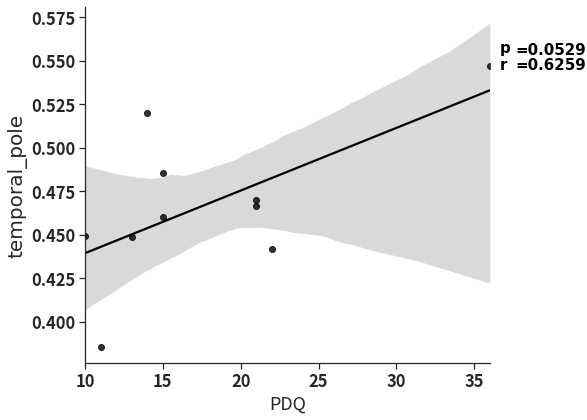

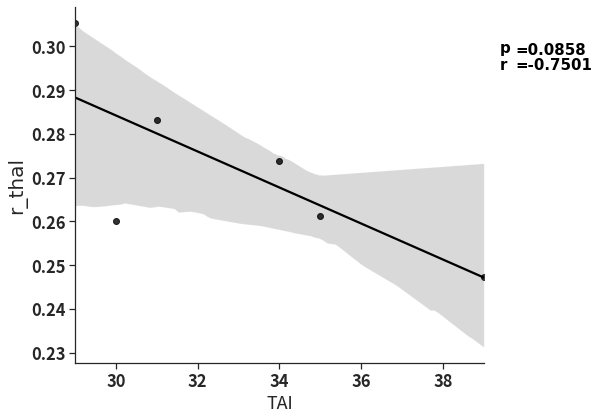

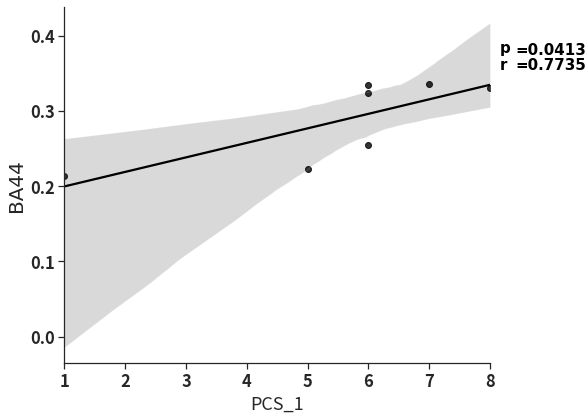

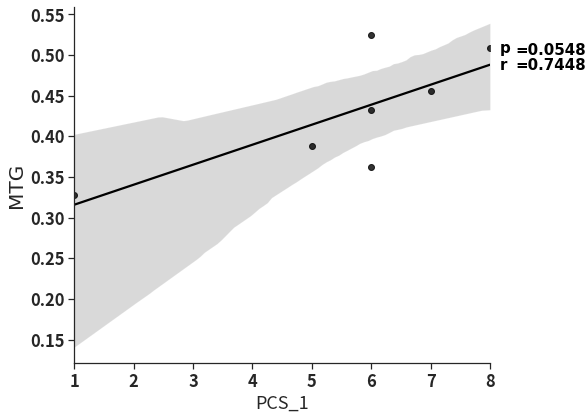

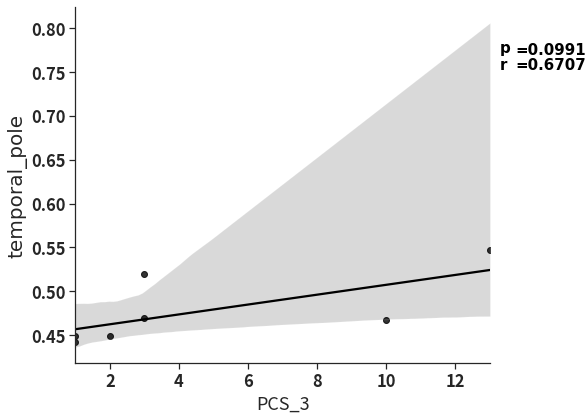

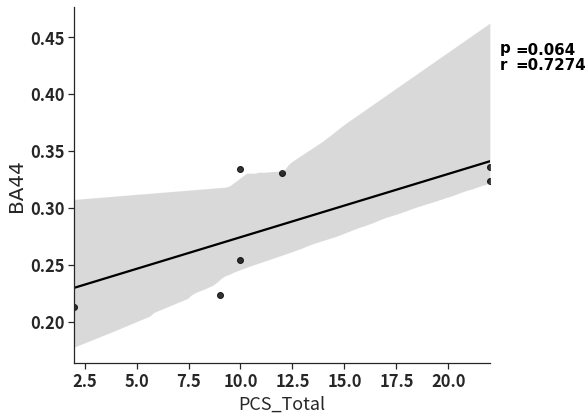

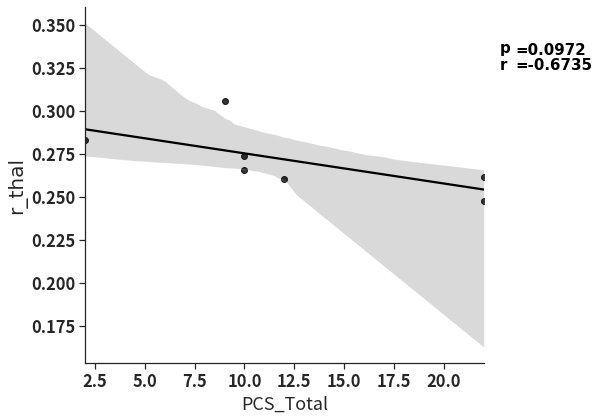

p value of pearson correlation test:


,SFMPQ,PDQ,PSQ,BDI,TAI,PSQI,FPQ_Severe,FPQ_Mild,FPQ_Medical,FPQ_Total,...,PCS_1,PCS_2,PCS_3,PCS_Total,PVAQ,LOT_R,SAI,VAS,HAMA,HAMD
BA9,0.3073,0.6414,0.4987,0.5745,0.8155,0.5411,0.4215,0.9800,0.9382,0.7496,...,0.6271,0.5827,0.9585,0.9740,0.1030,0.2450,0.6455,0.5582,0.9526,0.8798
BA44,0.2912,0.2195,0.2771,0.9814,0.2341,0.5430,0.7528,0.3938,0.2741,0.4632,...,0.0413,0.1969,0.2349,0.0640,0.7102,0.5201,0.8836,0.1554,0.8250,0.7835
M1,0.2457,0.1581,0.5906,0.4476,0.1950,0.6369,0.9109,0.2304,0.1539,0.4143,...,0.1434,0.8961,0.4371,0.3263,0.6253,0.7880,0.4117,0.3000,0.9865,0.7487
MTG,0.4229,0.3726,0.3164,0.7919,0.7295,0.2956,0.9165,0.6905,0.4884,0.6998,...,0.0548,0.4908,0.7078,0.3373,0.8933,0.2642,0.8136,0.2760,0.6238,0.3490
temporal_pole,0.9259,0.0529,0.6061,0.5651,0.3939,0.7407,0.8035,0.7751,0.3222,0.7789,...,0.1834,0.7970,0.0991,0.1683,0.5109,0.3043,0.1367,0.9718,0.9810,0.7296
r_thal,0.8394,0.1873,0.7638,0.7907,0.0858,0.4966,0.5877,0.6815,0.3180,0.8511,...,0.1915,0.3496,0.1633,0.0972,0.8526,0.8151,0.1439,0.5848,0.6314,0.7272


In [38]:
vbm_list = patient_vbm.columns
scale_list = list(scale_pt.columns[1:])
del scale_list[-9:-4]
rows = len(vbm_list)
cols = len(scale_list)
# Patients' correlation matrix
vbm_coefficient_matrix = pd.DataFrame(np.zeros(rows*cols).reshape(rows,cols),  index=vbm_list,columns=scale_list)
vbm_p_matrix = pd.DataFrame(np.zeros(rows*cols).reshape(rows,cols), index=vbm_list,columns=scale_list)
vbm_p_matrix_perm = vbm_p_matrix.copy()
vbm_norm_matrix = vbm_p_matrix.copy()


for scale in scale_list:
    x_label = scale
    for y_label in vbm_list:

        df = corr[[x_label, y_label]]
        df = df.dropna(how='any',axis=0) # drop any row with missing value to prevent overfit

        norm_bool = 1 if multivariate_normality(df[[x_label, y_label]])[2] else 0
        vbm_norm_matrix.loc[y_label, x_label] = norm_bool

        pccs = stats.pearsonr(df[x_label], df[y_label])
        vbm_coefficient_matrix.loc[y_label, x_label] = round(pccs[0],4)
        vbm_p_matrix.loc[y_label, x_label] = round(pccs[1],4)

        if pccs[1] < 0.1:

            plt.figure(figsize=(8,6))
            '''decorate image'''
            sns.set(font_scale=1.5)
            sns.set_style("white")
            plt.rcParams["font.weight"] = "bold"
            plt.rcParams["font.family"] = 'Noto Sans CJK JP'

            ax = plt.gca()      #gca='get current axis'
            # 将右边和上边的边框（脊）的颜色去掉
            ax.spines['right'].set_color('none')
            ax.spines['top'].set_color('none')

            # 绑定x轴和y轴
            font2 = {'weight' : 'normal','size'   : 20, }
            
            ax.xaxis.set_ticks_position('bottom')
            ax.yaxis.set_ticks_position('left')
            sns.set(color_codes=True)

            sns.regplot(x=x_label, y=y_label, data=df,color='black')
            plt.ylabel('{}'.format(y_label),font=font2)
            plt.annotate("p\nr", xy=(500, 350), xycoords='figure points',fontsize=15,color="black")

            plt.annotate("={}".format(round(vbm_p_matrix.loc[y_label, x_label],4)), 
            xy=(515, 365), xycoords='figure points',fontsize=15,color="black")
            plt.annotate("={}".format(vbm_coefficient_matrix.loc[y_label, x_label]), 
            xy=(515, 350), xycoords='figure points',fontsize=15,color="black")
            plt.tight_layout()
            plt.savefig('chart/vbm_{}_{}一元线性回归.svg'.format(x_label, y_label))
            plt.show()
print("p value of pearson correlation test:")
vbm_p_matrix

<AxesSubplot:>

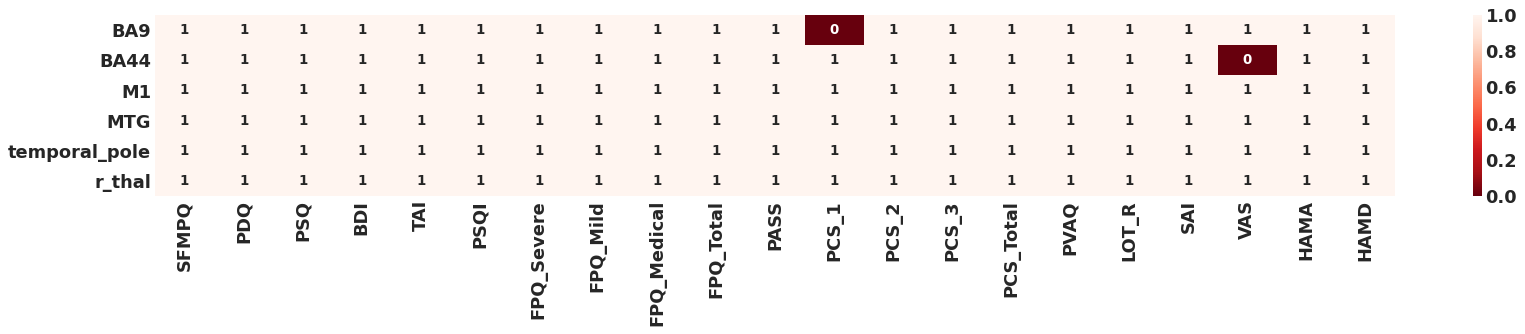

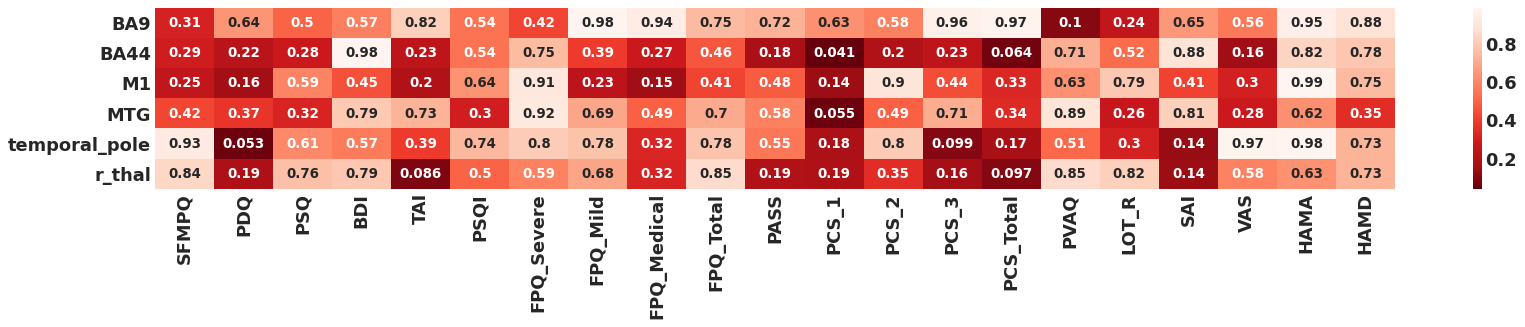

In [39]:
large = 22; med = 16; small = 12
params = {'axes.titlesize': large, 'legend.fontsize': med,  'figure.figsize': (16, 10), 'axes.labelsize': med,
          'axes.titlesize': med,   'xtick.labelsize': med,  'ytick.labelsize': med,  'figure.titlesize': large}

plt.figure(figsize=(25,3), dpi= 80)

plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
plt.rcParams['axes.unicode_minus'] = False  
sns.heatmap(vbm_norm_matrix, cmap='Reds_r', annot=True)

plt.figure(figsize=(25,3), dpi= 80)

plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
plt.rcParams['axes.unicode_minus'] = False  

sns.heatmap(vbm_p_matrix, cmap='Reds_r', annot=True)


## Comparasion pt1&pt2

In [40]:
vbm_result = []
for region in vbm_data.columns[:-1]:
    lev = stats.levene(patient_vbm[region], patient_vbm_2[region])
    equal_var = True if lev[1]>0.05 else False
    t_result = stats.ttest_ind(patient_vbm[region], patient_vbm_2[region], equal_var=equal_var)
    vbm_result.append(stats.shapiro(patient_vbm[region])+stats.shapiro(patient_vbm_2[region])+lev+tuple([round(t_result[0],5),round(t_result[1],5)]))
vbm_result_df = pd.DataFrame(vbm_result, index=vbm_data.columns[:-1], columns=['hc_norm_stat','hc_norm_p', 'pt_norm_stat','pt_norm_p','levene_stat', 'levene_p','ind_t','ind_t_p'])

In [12]:
vbm_result_df.to_csv('vbm_hc&pt1.csv')

In [29]:
vbm_data.groupby('timepoint').mean().T.to_csv('hcpt1_mean.csv')
vbm_data.groupby('timepoint').std().T.to_csv('hcpt1_std.csv')

In [28]:
!fsleyes -std stats/averageintensity/masks/s5_M1_mask 
!fsleyes -std stats/averageintensity/masks/s5_BA9_mask


  return len(self._mapping)





In [14]:
db.close()